I like the Chebyshev approximation.

https://stackoverflow.com/questions/345085/how-do-trigonometric-functions-work/345117

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.999995*x-0.1666016*(x**3)+0.0081215*(x**5)

In [45]:
x = np.linspace(-np.pi/4, np.pi/4, 10000)
y = np.sin(x)
y2 = f(x)

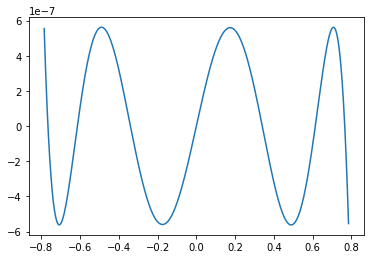

5.62480625965e-07


In [46]:
plt.plot(x, y - y2)
plt.show()
print np.max(y - y2)

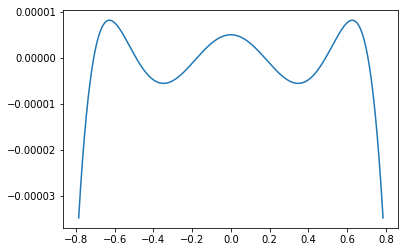

8.15930016451e-06


In [48]:
# Differentiate above to get cosine. See how is the results.
def g(x):
    return 0.999995-3.0*0.1666016*(x**2)+5.0*0.0081215*(x**4)

y = np.cos(x)
y2 = g(x)
plt.plot(x, y - y2)
plt.show()
print np.max(y - y2)

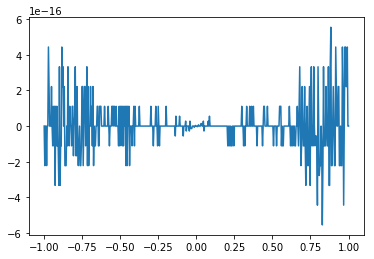

In [11]:
def cheb(j, x):
    if j == 0:
        return np.ones(x.shape)
    if j == 1:
        return x
    return 2.0 * x * cheb(j-1, x) - cheb(j-2, x)


x = np.linspace(-1, 1, 500)
plt.plot(x, cheb(3, x) - (4.0 * (x**3) - 3.0 * x))
plt.show()

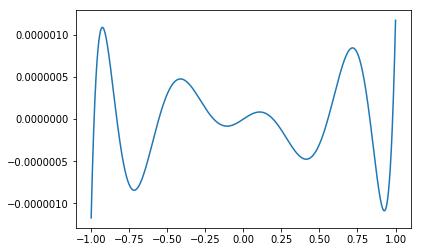

1.17160946378e-06


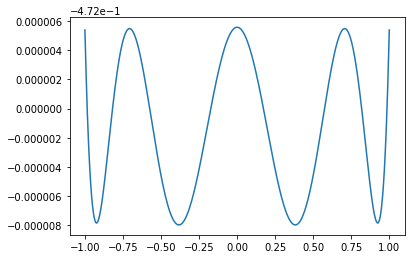

0.472007985743


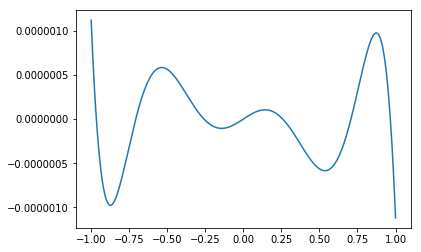

1.11875367381e-06


In [69]:
def f(x):
    return np.sin(np.pi * x * 0.5)


def get_coefs(m, f):
    k = np.arange(1, m + 1).astype(float)
    roots = np.cos(np.pi * (k - 0.5) / m)
    coefs = []
    for i in xrange(m):
        coefs.append(np.sum(f(roots) * cheb(i, roots)) * (2.0 / m))
    return coefs


def analyze(coefs, f):
    x = np.linspace(-1, 1, 1000)
    y = np.zeros(x.shape)
    for i in xrange(m):
        y += coefs[i] * cheb(i, x)

    plt.plot(x, f(x) - y)
    plt.show()
    print np.max(np.abs(y - f(x)))


# Simplest version.
m = 8
my_sin = lambda x: np.sin(np.pi*x*0.5)
coefs_sin = get_coefs(m, my_sin)
coefs_sin[0] = 0
coefs_sin[2] = 0
coefs_sin[4] = 0
coefs_sin[6] = 0
analyze(coefs_sin, my_sin)

# Doing cosine directly is bad.
m = 8
my_cos = lambda x: np.cos(np.pi*x*0.5)
coefs_cos = get_coefs(m, my_cos)
analyze(coefs_cos, my_cos)

# Smaller range (-pi/4, pi/4) gives better accuracy but leads to more cases to consider.
# Might also need to apply sqrt(1-sin^2(x)) eventually.
m = 6
my_sin = lambda x: np.sin(np.pi*x*0.25)
coefs_sin = get_coefs(m, my_sin)
analyze(coefs_sin, my_sin)


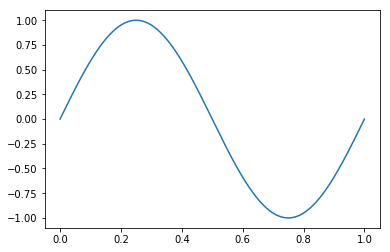

[1.1102230246251565e-16, 1.1336481778117871, 0.0, -0.13807177660048911, -3.0531133177191805e-16, 0.0044907175846143066, 1.6653345369377348e-16, -6.8290405376023045e-05]


In [70]:
# Let's use this one.
# f(x) = sin(0.5*pi*x). Domain is [-1, 1] which corresponds to [-pi/2, pi/2].
# Our main function is g(x)=sin(2*pi*x) where 0<x<1.
# Case 1: 0<x<0.25 (0 to pi/2): Return g(x)=f(4*x).
# Case 2: 0.25<x<0.5 (pi/2 to pi): Return g(x)=g(0.5-x)=f(4*(0.5-x))=f(2-4*x).
# Case 3: 0.5<x<0.75 (pi to 1.5pi): Return -g(x-0.5)=-f(4*(x-0.5))=-f(4x-2)
# Case 4: 0.75<x<1.0 (1.5pi to 2pi): Return -g(1.0-x)=-f(4*(1.0-x))=-f(4-4x)
m = 8
my_sin = lambda x: np.sin(np.pi*x*0.5)
coefs_sin = get_coefs(m, my_sin)

def my_approx(x):
    y = np.zeros(x.shape)
    for i in xrange(m):
        y += coefs[i] * cheb(i, x)
    return y
        
x = np.linspace(0, 1, 5000)
y = np.zeros(x.shape)

mask = x<0.25
y[mask] = my_approx(x[mask] * 4)

mask = np.logical_and(x>=0.25, x<0.75)
y[mask] = my_approx(2-4*x[mask])

mask = x>=0.75
y[mask] = my_approx(-4+4*x[mask])

plt.plot(x, y)
plt.show()

print coefs_sin
